## Observations and Insights 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Check the number of mice.


In [7]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [10]:
# Check the number of mice in the clean DataFrame.


## Summary Statistics

In [11]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [12]:
# Method 2(optional): Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function. (https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)
drug_group_summary = combined_df.groupby('Drug Regimen').agg(\
        tumor_mean=('Tumor Volume (mm3)', np.mean),\
        tumor_median=('Tumor Volume (mm3)', np.median),\
        tumor_var=('Tumor Volume (mm3)', np.var),\
        tumor_std=('Tumor Volume (mm3)', np.std),\
        tumor_sem=('Tumor Volume (mm3)', st.sem)\
).round(3)

drug_group_summary

,tumor_mean,tumor_median,tumor_var,tumor_std,tumor_sem
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

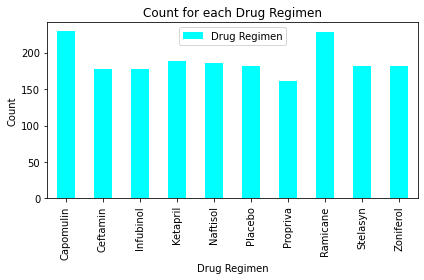

In [20]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 
drug_group = combined_df.groupby('Drug Regimen')

drug_group_count = pd.DataFrame(drug_group['Drug Regimen'].count())

count_chart = drug_group_count.plot(kind='bar', title="Count for each Drug Regimen", color="cyan")

count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Count")
plt.tight_layout()
plt.savefig("figures/PandasBarChart.png")

plt.show()

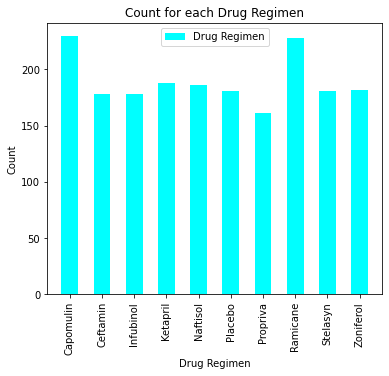

In [21]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.
x_axis = np.arange(len(drug_group_count))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(6,5))
plt.bar(x_axis, drug_group_count["Drug Regimen"], color='cyan', align="center", width = 0.52)
plt.xticks(tick_locations, list(drug_group_count.index), rotation="vertical")
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(drug_group_count["Drug Regimen"])*1.05)
plt.title("Count for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")
plt.savefig("figures/PyplotBarChart.png")

plt.show()
##  Note: this plot will be identical to the one that uses Pandas

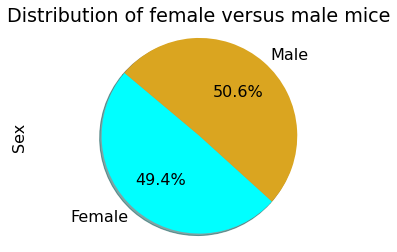

In [26]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice
sex_group = combined_df.groupby('Sex')

sex_group_count = pd.DataFrame(sex_group['Sex'].count())

sex_group_count.plot(kind='pie', y='Sex', \
                     title="Distribution of female versus male mice",startangle=140,\
                     autopct='%1.1f%%',shadow=True, fontsize=16, colors =["cyan","goldenrod"],legend =False)
plt.axis("equal")
plt.savefig("figures/PandaPieChart.png")
plt.show()
## Note: this plot will be identical to the one that uses Pyplot

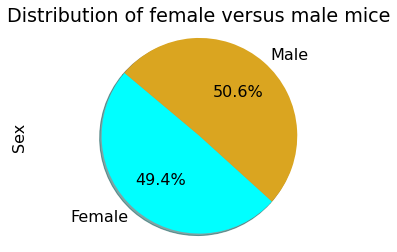

In [27]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice
sexes = list(sex_group_count.index.values)

sex_counts = sex_group_count['Sex']

colors = ["cyan", "goldenrod"]

plt.pie(sex_counts, labels=sexes, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 16
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.savefig("figures/PyplotPieChart.png")
plt.show()
##  Note: this plot will be identical to the one that uses Pandas

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (latest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put the four drug regimens into a list that can be iterated over in a for-loop 
# (and later used for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.
